In [1]:
# Import packages
import pandas as pd # Reading csv file 
from shapely.geometry import Point # Shapely for converting latitude/longtitude to geometry
import geopandas as gpd # To create GeodataFrame
import matplotlib.pyplot as plt # for plotting
from pyproj import CRS

In [2]:
# import housing data
df_all = pd.read_csv('data/kc_house_data.csv')
df_all.head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0,1987,0.0,98074,47.6168,-122.045,1800,7503
5,7237550310,5/12/2014,1230000,4,4.50,5420,101930,1.0,0.0,0.0,...,11,3890,1530,2001,0.0,98053,47.6561,-122.005,4760,101930
6,1321400060,6/27/2014,257500,3,2.25,1715,6819,2.0,0.0,0.0,...,7,1715,?,1995,0.0,98003,47.3097,-122.327,2238,6819
7,2008000270,1/15/2015,291850,3,1.50,1060,9711,1.0,0.0,NaN,...,7,1060,0,1963,0.0,98198,47.4095,-122.315,1650,9711
8,2414600126,4/15/2015,229500,3,1.00,1780,7470,1.0,0.0,0.0,...,7,1050,730,1960,0.0,98146,47.5123,-122.337,1780,8113
9,3793500160,3/12/2015,323000,3,2.50,1890,6560,2.0,0.0,0.0,...,7,1890,0,2003,0.0,98038,47.3684,-122.031,2390,7570


In [9]:
# clean data--convert "NaN" to 0 and replace "?" with 0
df_all = df_all.fillna(0).replace('?',0)
df_all.head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900,3,1.00,1180,5650,1.0,0.0,0.0,...,7,1180,0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0,1933,0.0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0,1987,0.0,98074,47.6168,-122.045,1800,7503
5,7237550310,5/12/2014,1230000,4,4.50,5420,101930,1.0,0.0,0.0,...,11,3890,1530,2001,0.0,98053,47.6561,-122.005,4760,101930
6,1321400060,6/27/2014,257500,3,2.25,1715,6819,2.0,0.0,0.0,...,7,1715,0,1995,0.0,98003,47.3097,-122.327,2238,6819
7,2008000270,1/15/2015,291850,3,1.50,1060,9711,1.0,0.0,0.0,...,7,1060,0,1963,0.0,98198,47.4095,-122.315,1650,9711
8,2414600126,4/15/2015,229500,3,1.00,1780,7470,1.0,0.0,0.0,...,7,1050,730,1960,0.0,98146,47.5123,-122.337,1780,8113
9,3793500160,3/12/2015,323000,3,2.50,1890,6560,2.0,0.0,0.0,...,7,1890,0,2003,0.0,98038,47.3684,-122.031,2390,7570


In [16]:
# filter properties 
df = df_all[(df_all['price'] <= 1050000) & 
            (df_all['price'] >= 105000)]
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900,3,1.00,1180,5650,1.0,0.0,0.0,...,7,1180,0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0,1933,0.0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000,3,2.50,1530,1131,3.0,0.0,0.0,...,8,1530,0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000,4,2.50,2310,5813,2.0,0.0,0.0,...,8,2310,0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101,2,0.75,1020,1350,2.0,0.0,0.0,...,7,1020,0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000,3,2.50,1600,2388,2.0,0.0,0.0,...,8,1600,0,2004,0.0,98027,47.5345,-122.069,1410,1287


<AxesSubplot:xlabel='id', ylabel='price'>

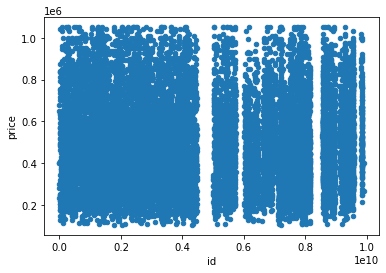

In [17]:
# want to look at price range
df.plot(kind='scatter', x='id', y='price')

In [18]:
# function to create GeoDataFrame
def add_geo_col(df):
    # create a geometry column 
    geometry = [Point(xy) for xy in zip(df['long'], df['lat'])]

    # Coordinate reference system : WGS84 (the GPS model for conversion)
    crs = CRS('epsg:4326')

    # Creating a Geographic data frame 
    gdf = gpd.GeoDataFrame(df, crs=crs, geometry=geometry).reset_index()
    return gdf

In [19]:
gdf = add_geo_col(df)
gdf.head()

,index,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,geometry
0,0,7129300520,10/13/2014,221900,3,1.00,1180,5650,1.0,0.0,...,1180,0,1955,0.0,98178,47.5112,-122.257,1340,5650,POINT (-122.25700 47.51120)
1,1,6414100192,12/9/2014,538000,3,2.25,2570,7242,2.0,0.0,...,2170,400,1951,1991.0,98125,47.7210,-122.319,1690,7639,POINT (-122.31900 47.72100)
2,2,5631500400,2/25/2015,180000,2,1.00,770,10000,1.0,0.0,...,770,0,1933,0.0,98028,47.7379,-122.233,2720,8062,POINT (-122.23300 47.73790)
3,3,2487200875,12/9/2014,604000,4,3.00,1960,5000,1.0,0.0,...,1050,910,1965,0.0,98136,47.5208,-122.393,1360,5000,POINT (-122.39300 47.52080)
4,4,1954400510,2/18/2015,510000,3,2.00,1680,8080,1.0,0.0,...,1680,0,1987,0.0,98074,47.6168,-122.045,1800,7503,POINT (-122.04500 47.61680)


<AxesSubplot:>

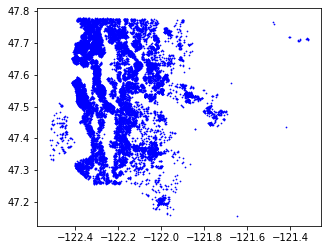

In [20]:
# Plot all points
gdf.plot(marker='o', color='b', markersize=0.5)

In [10]:
# check what projection is used
gdf.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [21]:
# function to convert meters to miles
def m_2_mi(meters): 
    return meters * 0.00062137

In [22]:
# function to find distance between two Points
def dist_to_point(point1, point2):
    pt1_gdf = gpd.GeoSeries([point1], crs=4326)
    pt2_gdf = gpd.GeoSeries([point2], crs=4326)
    pt1_gdf = pt1_gdf.to_crs(3857)
    pt2_gdf = pt2_gdf.to_crs(3857)
    distance = m_2_mi(pt1_gdf.distance(pt2_gdf))
    return round(distance.at[0], 3)

In [13]:
# Want to compile list of top 5 employers in Seattle area with a centralized campus
# Source is https://www.huduser.gov/portal/publications/pdf/SeattleWA-CHMA-19.pdf
# df_top10_employers = pd.read_csv('data/top_employers.csv')
# df_central5 = df_top10_employers[df_top10_employers['centralized_campus']=='y'].reset_index()
# df_central5 = add_geo_col(df_central5)
# df_central5

,level_0,index,rank,employer,no_employees,long,lat,centralized_campus,geometry
0,0,0,1,The Boeing Company,"64,300",-122.312023,47.532685,y,POINT (-122.31202 47.53269)
1,1,1,2,"Amazon.com, Inc.","45,000",-122.339688,47.615875,y,POINT (-122.33969 47.61588)
2,2,2,3,Microsoft Corporation,"43,031",-122.339688,47.645744,y,POINT (-122.33969 47.64574)
3,3,3,4,University of Washington,"30,200",-122.303644,47.655544,y,POINT (-122.30364 47.65554)
4,4,7,8,Starbucks Corporation,"11,239",-122.336000,47.580700,y,POINT (-122.33600 47.58070)


In [14]:
# function to find the average distance of a house to the top 5 employers
# def avg_dists(point1, gdf): 
#     dists = [dist_to_point(point1, point2) for point2 in gdf['geometry']]
#     avg = sum(dists)/len(dists)
#     return avg

In [23]:
downtown = Point(-122.3344, 47.6050) # coordinates for center of downtown Seattle

# Calculate average distance of each property to central downtown
gdf['dist_2_downtown'] = [dist_to_point(point, downtown) for point in gdf['geometry']]

In [16]:
# Calculate average distance of each property to the top 5 employers
# gdf['avg_dists'] = [avg_dists(point, df_central5) for point in gdf['geometry']]

In [24]:
gdf.head()

,index,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,geometry,dist_2_downtown
0,0,7129300520,10/13/2014,221900,3,1.00,1180,5650,1.0,0.0,...,0,1955,0.0,98178,47.5112,-122.257,1340,5650,POINT (-122.25700 47.51120),11.005
1,1,6414100192,12/9/2014,538000,3,2.25,2570,7242,2.0,0.0,...,400,1951,1991.0,98125,47.7210,-122.319,1690,7639,POINT (-122.31900 47.72100),11.961
2,2,5631500400,2/25/2015,180000,2,1.00,770,10000,1.0,0.0,...,0,1933,0.0,98028,47.7379,-122.233,2720,8062,POINT (-122.23300 47.73790),15.348
3,3,2487200875,12/9/2014,604000,4,3.00,1960,5000,1.0,0.0,...,910,1965,0.0,98136,47.5208,-122.393,1360,5000,POINT (-122.39300 47.52080),9.536
4,4,1954400510,2/18/2015,510000,3,2.00,1680,8080,1.0,0.0,...,0,1987,0.0,98074,47.6168,-122.045,1800,7503,POINT (-122.04500 47.61680),20.055


In [25]:
gdf.to_pickle('data/geodata.pkl')